In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import csv
import datetime

# Weather URL
#History weather bulk for Detroit from January 01, 2014 to December 31, 2018
weather_url = "http://history.openweathermap.org//storage/dc1e5df660e33aec203660c9b2000bc3.json"

# make request and store response
response = requests.get(weather_url)

# print status code
print(response.status_code)


200


In [2]:
#JSONify response
response_json = response.json()


In [3]:
# print first article
print(f"The first response is {json.dumps(response_json[0], indent=4)}.")

The first response is {
    "city_id": 4990729,
    "main": {
        "temp": 265.33,
        "temp_min": 263.71,
        "temp_max": 266.48,
        "pressure": 1025,
        "humidity": 61
    },
    "wind": {
        "speed": 5,
        "deg": 250
    },
    "clouds": {
        "all": 90
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04"
        }
    ],
    "dt": 1388534400,
    "dt_iso": "2014-01-01 00:00:00 +0000 UTC"
}.


In [23]:
unixDict = {}
i = 0
for entry in response_json:
    i = i + 1
    try:
        unixDict[entry['dt']] = {
            'dt_iso': entry['dt_iso'],
            'temp_max': entry['main']['temp_max'],
            'wind_speed': entry['wind']['speed'],
            'weather_main': entry['weather'][0]['main']
        }
    except:
        print(f'no data for {entry["dt"]}')

print(unixDict[1388534400])

{'dt_iso': '2014-01-01 00:00:00 +0000 UTC', 'temp_max': 266.48, 'wind_speed': 5, 'weather_main': 'Clouds'}


In [6]:
# reference to CSV file
DET_csv = os.path.join("City Data","Detroit","detroit_data_fixed.csv")

with open(DET_csv, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")

DET_crime_df = pd.read_csv(DET_csv)
DET_crime_df.head()


,Location,Offense,Date,Unix Date
0,"(42.4224, -82.986)",LARCENY: LARCENY (OTHER),01/02/2014,1388638800
1,"(42.386, -83.2736)",ESCAPE: FUGITIVE,01/03/2014,1388725200
2,"(42.4424, -83.0719)",ASSAULT: INTIMIDATION,01/04/2014,1388811600
3,"(42.3373, -83.1961)",LARCENY: LARCENY (OTHER),01/04/2014,1388811600
4,"(42.3314, -83.1239)",LARCENY: LARCENY (OTHER),01/06/2014,1388984400


In [24]:
DET_crime_df["UTC_Date"] = ""
DET_crime_df["Temp_Max"] = ""
DET_crime_df["Wind_Speed"] = ""
DET_crime_df["Weather_Type"] = ""
DET_crime_df.head()

,Location,Offense,Date,Unix Date,Temp_Max,Wind_Speed,Weather_Type,UTC_Date
0,"(42.4224, -82.986)",LARCENY: LARCENY (OTHER),01/02/2014,1388638800,,,,
1,"(42.386, -83.2736)",ESCAPE: FUGITIVE,01/03/2014,1388725200,,,,
2,"(42.4424, -83.0719)",ASSAULT: INTIMIDATION,01/04/2014,1388811600,,,,
3,"(42.3373, -83.1961)",LARCENY: LARCENY (OTHER),01/04/2014,1388811600,,,,
4,"(42.3314, -83.1239)",LARCENY: LARCENY (OTHER),01/06/2014,1388984400,,,,


In [8]:
# Use unix date to identify weather

def getWeather(t,val):
    try:
        return unixDict[t['Unix Date']][val]
    except:
        return 'N/A'

DET_crime_df['Temp_Max'] = DET_crime_df.apply(lambda row: getWeather(row,'temp_max'),axis=1)
DET_crime_df['Wind_Speed'] = DET_crime_df.apply(lambda row: getWeather(row, 'wind_speed'),axis=1)
DET_crime_df['Weather_Type'] = DET_crime_df.apply(lambda row: getWeather(row, 'weather_main'),axis=1)


In [9]:
weather_df = DET_crime_df.loc[DET_crime_df['Temp_Max'] != 'N/A']
weather_df.head()

,Location,Offense,Date,Unix Date,Temp_Max,Wind_Speed,Weather_Type
0,"(42.4224, -82.986)",LARCENY: LARCENY (OTHER),01/02/2014,1388638800,284.618,4,Clouds
1,"(42.386, -83.2736)",ESCAPE: FUGITIVE,01/03/2014,1388725200,259.15,5,Clouds
2,"(42.4424, -83.0719)",ASSAULT: INTIMIDATION,01/04/2014,1388811600,263.15,1,Haze
3,"(42.3373, -83.1961)",LARCENY: LARCENY (OTHER),01/04/2014,1388811600,263.15,1,Haze
4,"(42.3314, -83.1239)",LARCENY: LARCENY (OTHER),01/06/2014,1388984400,270.15,4,Rain


In [10]:
#new data frame with split value columns 
new_weather_df = weather_df["Offense"].str.split(":", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
weather_df["Offense Main"]= new_weather_df[0] 
  
# making seperate last name column from new data frame 
weather_df["Offense Sub"]= new_weather_df[1] 
  
# Dropping old Name columns 
weather_df.drop(columns =["Offense"], inplace = True) 
  
# df display 
weather_df.head()

/Users/brianvanhoff/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/brianvanhoff/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brianvanhoff/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata

,Location,Date,Unix Date,Temp_Max,Wind_Speed,Weather_Type,Offense Main,Offense Sub
0,"(42.4224, -82.986)",01/02/2014,1388638800,284.618,4,Clouds,LARCENY,LARCENY (OTHER)
1,"(42.386, -83.2736)",01/03/2014,1388725200,259.15,5,Clouds,ESCAPE,FUGITIVE
2,"(42.4424, -83.0719)",01/04/2014,1388811600,263.15,1,Haze,ASSAULT,INTIMIDATION
3,"(42.3373, -83.1961)",01/04/2014,1388811600,263.15,1,Haze,LARCENY,LARCENY (OTHER)
4,"(42.3314, -83.1239)",01/06/2014,1388984400,270.15,4,Rain,LARCENY,LARCENY (OTHER)


In [11]:
#convert temp from Kelvins to Farenheit
weather_df["Temp_Max_Fahrenheit"] = (weather_df["Temp_Max"] - 273.15) * 9/5 + 32
weather_df.head()



/Users/brianvanhoff/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Location,Date,Unix Date,Temp_Max,Wind_Speed,Weather_Type,Offense Main,Offense Sub,Temp_Max_Fahrenheit
0,"(42.4224, -82.986)",01/02/2014,1388638800,284.618,4,Clouds,LARCENY,LARCENY (OTHER),52.6424
1,"(42.386, -83.2736)",01/03/2014,1388725200,259.15,5,Clouds,ESCAPE,FUGITIVE,6.8
2,"(42.4424, -83.0719)",01/04/2014,1388811600,263.15,1,Haze,ASSAULT,INTIMIDATION,14
3,"(42.3373, -83.1961)",01/04/2014,1388811600,263.15,1,Haze,LARCENY,LARCENY (OTHER),14
4,"(42.3314, -83.1239)",01/06/2014,1388984400,270.15,4,Rain,LARCENY,LARCENY (OTHER),26.6


In [12]:
maker_group = weather_df.groupby('Offense Main')

# Count how many times each maker appears in our group
count_makers = maker_group['Offense Main'].count()

count_makers.head()


Offense Main
AGGRAVATED ASSAULT     8789
ARSON                   818
ASSAULT               17572
BRIBERY                   3
BURGLARY               9841
Name: Offense Main, dtype: int64

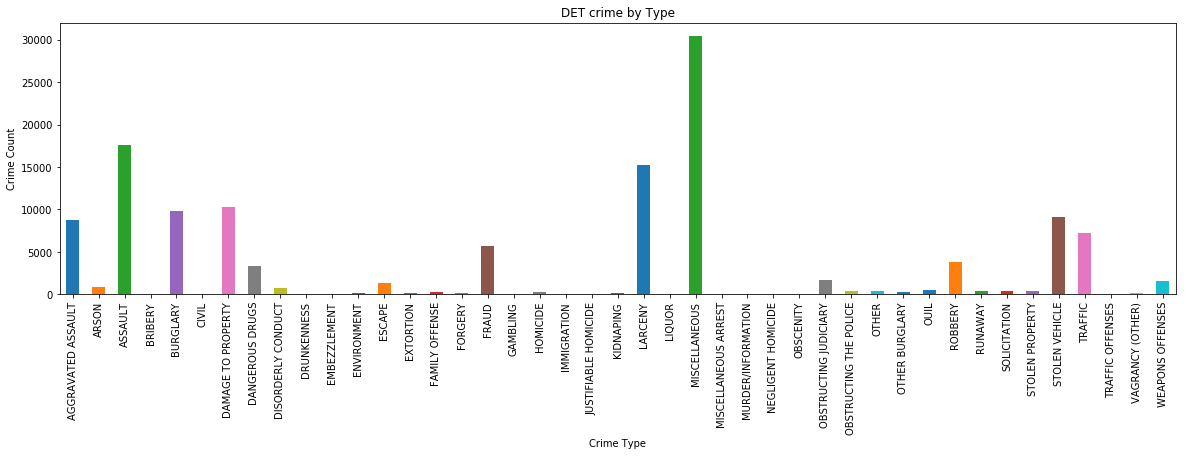

In [13]:
count_chart = count_makers.plot(kind='bar',figsize=(20,5))
count_chart.set_xlabel("Crime Type")
count_chart.set_ylabel("Crime Count")
plt.title("DET crime by Type")
plt.show()


In [14]:
maker_group_date = weather_df.groupby('Weather_Type')

# Count how many times each maker appears in our group
count_makers_date = maker_group_date['Weather_Type'].count()

count_makers_date

Weather_Type
Clear           55371
Clouds          37737
Drizzle           359
Fog              1657
Haze             3848
Mist            10859
Rain            18685
Smoke             359
Snow             2831
Thunderstorm      347
Name: Weather_Type, dtype: int64

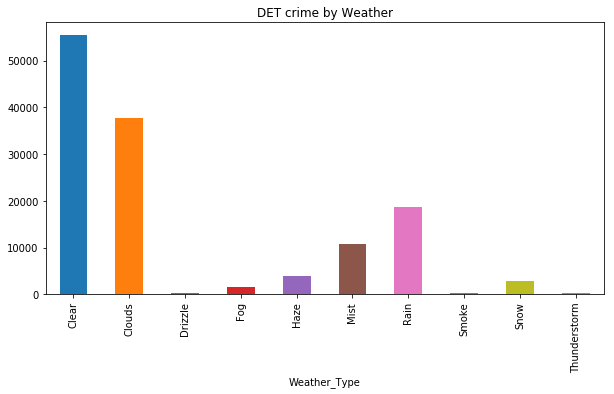

In [15]:
count_chart_2 = count_makers_date.plot(kind='bar',figsize=(10,5))
count_chart.set_xlabel("Weather Type")
count_chart.set_ylabel("Weather Count")
plt.title("DET crime by Weather")
plt.show()

In [16]:
maker_group_2 = weather_df.groupby('Unix Date')

# Count how many times each maker appears in our group
count_makers_2 = maker_group_2['Unix Date'].count()

count_makers_2.head()

Unix Date
1388552400    456
1388638800    261
1388725200    313
1388811600    328
1388898000    241
Name: Unix Date, dtype: int64

In [17]:
wind_group_5 = weather_df.groupby('Wind_Speed')

# Count how many times each maker appears in our group
count_wind_5 = wind_group_5['Wind_Speed'].count()

count_wind_5.sort_values(ascending=False, na_position='first')
                         
print(wind_group_5)

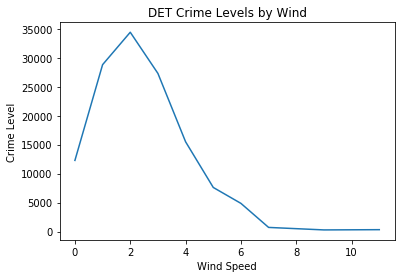

In [18]:
wind_chart_5 = count_wind_5.plot.line()
wind_chart_5.set_xlabel("Wind Speed")
wind_chart_5.set_ylabel("Crime Level")
plt.title("DET Crime Levels by Wind")
# Sets the x limits of the current chart
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.show()

In [19]:
temp_group_5 = weather_df.groupby('Temp_Max_Fahrenheit')

# Count how many times each maker appears in our group
count_temp_5 = temp_group_5['Temp_Max_Fahrenheit'].count()

count_temp_5.sort_values(ascending=False, na_position='first')
                         
print(temp_group_5)

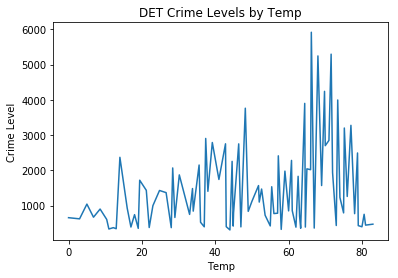

In [20]:
temp_chart_5 = count_temp_5.plot.line()
temp_chart_5.set_xlabel("Temp")
temp_chart_5.set_ylabel("Crime Level")
plt.title("DET Crime Levels by Temp")
# Sets the x limits of the current chart
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.show()